<a href="https://colab.research.google.com/github/brunoFNIR/billionaires-statistics/blob/main/data_analysys_billionaires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import requests
import io
import chardet

In [2]:
# load data from drive
url = 'raw.githubusercontent.com'
username = 'brunoFNIR'
repository = 'billionaires-statistics'
file_name = 'archive.zip'

path = f'https://{url}/{username}/{repository}/main/Downloads/{file_name}'

In [3]:
# Download the zip file content
response = requests.get(path)
response.raise_for_status()  # Raise an exception for bad responses

# Open the zip file in memory using BytesIO
with io.BytesIO(response.content) as zip_file_memory: # Create a file-like object in memory
    with ZipFile(zip_file_memory, 'r') as zipObj: # Open the zip file from memory
        zipObj.extractall() # Extract all files

In [4]:
#avoid encoding issues
with open('Billionaires Statistics Dataset.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
df = pd.read_csv('Billionaires Statistics Dataset.csv', encoding=result['encoding'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [6]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [7]:
# verifies column 'selfMade' values format
df['selfMade'].unique()

array([False,  True])

In [8]:
df['selfMade'] = df['selfMade'].astype(str).str.lower()

In [9]:
# change 'selfMade' column dtype
df['selfMade'] = df['selfMade'].map({'false': 0, 'true': 1})

In [10]:
# normalize 'gpd_country' column
df['gdp_country'] = df['gdp_country'].astype(str).apply(lambda x: x.replace('$', '').replace(',', ''))

In [11]:
df['gdp_country'] = df['gdp_country'].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

<Axes: >

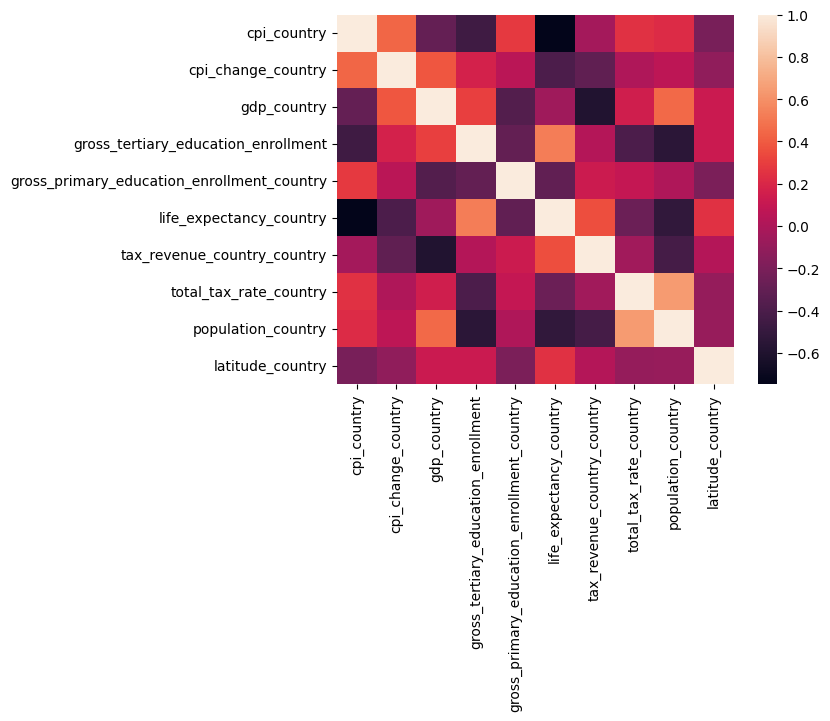

In [13]:
# correlation between 24 - 34 columns (the columns seem to measure similar things)
sns.heatmap(df[df.columns[24:34]].corr())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [15]:
df['title'].head()

,title
0,Chairman and CEO
1,CEO
2,Chairman and Founder
3,CTO and Founder
4,CEO


In [16]:
# drop 'organization', 'tile', 'state', 'residenceStateRegion' columns, due to high proportion of missing values
df.drop(['organization', 'title', 'state', 'residenceStateRegion'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  selfMade    

In [18]:
# drop remaining missing values
df.dropna(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369 entries, 0 to 2639
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2369 non-null   int64  
 1   finalWorth                                  2369 non-null   int64  
 2   category                                    2369 non-null   object 
 3   personName                                  2369 non-null   object 
 4   age                                         2369 non-null   float64
 5   country                                     2369 non-null   object 
 6   city                                        2369 non-null   object 
 7   source                                      2369 non-null   object 
 8   industries                                  2369 non-null   object 
 9   countryOfCitizenship                        2369 non-null   object 
 10  selfMade         

<Axes: >

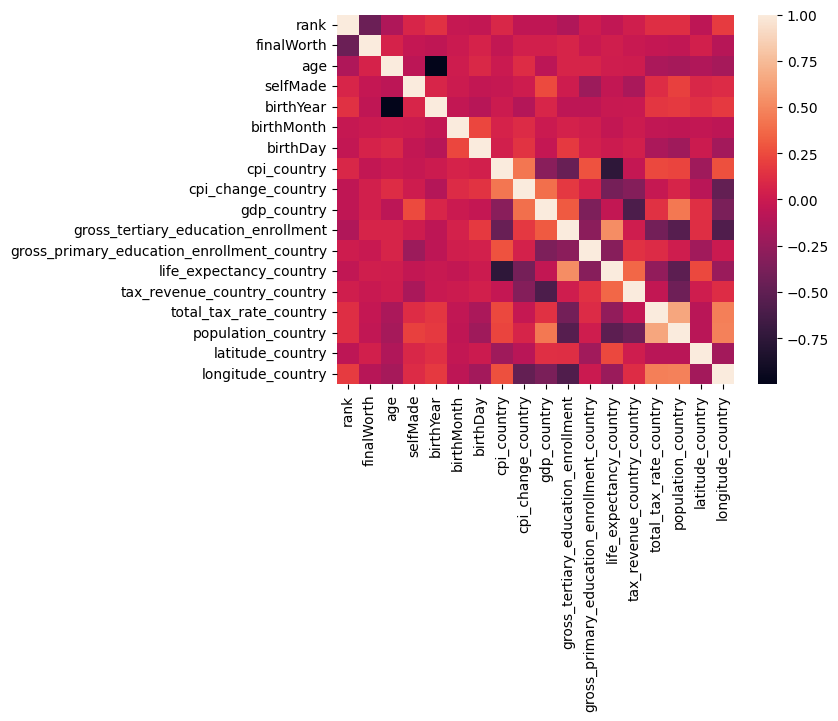

In [20]:
# correlation matrix of all numeric columns
numeric_columns = df.select_dtypes(exclude='object').columns
sns.heatmap(df[numeric_columns].corr())

In [21]:
# drop 'age' column due to 'poor data'
df.drop('age', axis=1, inplace=True)

In [22]:
# drop 'status' column because it has the same idea as 'selfMade' column
df.drop('status', axis=1, inplace=True)

In [23]:
df['industries'].unique()

array(['Fashion & Retail', 'Automotive', 'Technology',
       'Finance & Investments', 'Media & Entertainment', 'Telecom',
       'Diversified', 'Food & Beverage', 'Logistics',
       'Gambling & Casinos', 'Manufacturing', 'Metals & Mining', 'Energy',
       'Healthcare', 'Service', 'Real Estate',
       'Construction & Engineering', 'Sports'], dtype=object)

In [24]:
df['category'].unique()

array(['Fashion & Retail', 'Automotive', 'Technology',
       'Finance & Investments', 'Media & Entertainment', 'Telecom',
       'Diversified', 'Food & Beverage', 'Logistics',
       'Gambling & Casinos', 'Manufacturing', 'Metals & Mining', 'Energy',
       'Healthcare', 'Service', 'Real Estate',
       'Construction & Engineering', 'Sports'], dtype=object)

In [25]:
df[['category', 'industries']].head()

,category,industries
0,Fashion & Retail,Fashion & Retail
1,Automotive,Automotive
2,Technology,Technology
3,Technology,Technology
4,Finance & Investments,Finance & Investments


In [26]:
# verifies if the values in columns 'industries' and 'category' are identical
industries_array = df['industries'].values
category_array = df['category'].values

if np.all(industries_array == category_array):
  print('yes')

yes


In [27]:
# drop 'category' column due to identical values as 'industries' column
df.drop('category', axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369 entries, 0 to 2639
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2369 non-null   int64  
 1   finalWorth                                  2369 non-null   int64  
 2   personName                                  2369 non-null   object 
 3   country                                     2369 non-null   object 
 4   city                                        2369 non-null   object 
 5   source                                      2369 non-null   object 
 6   industries                                  2369 non-null   object 
 7   countryOfCitizenship                        2369 non-null   object 
 8   selfMade                                    2369 non-null   int64  
 9   gender                                      2369 non-null   object 
 10  birthDate        

In [29]:
# verifies columns carndinality
df.nunique()

,0
rank,214
finalWorth,214
personName,2367
country,63
city,708
source,856
industries,18
countryOfCitizenship,70
selfMade,2
gender,2


<Axes: xlabel='industries'>

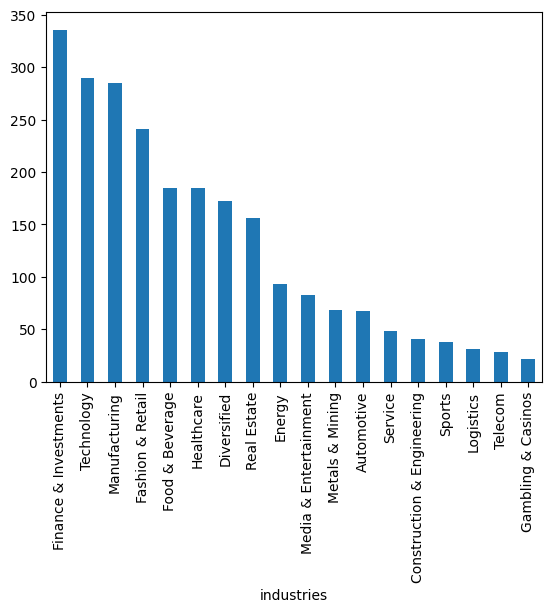

In [30]:
# industries histogram
df['industries'].value_counts().plot(kind='bar')

<Axes: xlabel='source'>

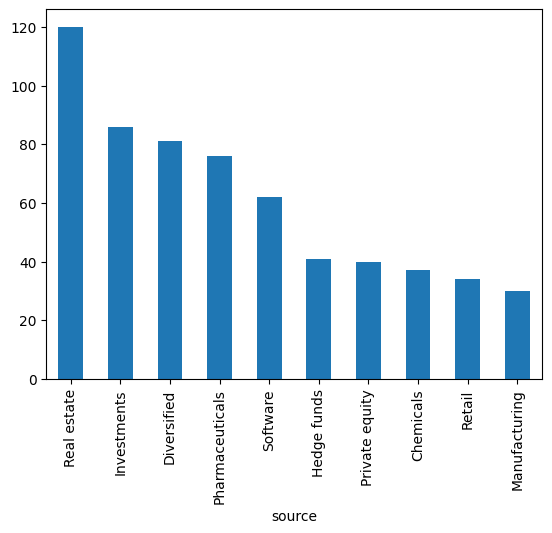

In [31]:
# top 10 source histogram
top_10 = df['source'].value_counts().head(10)
top_10.plot(kind='bar')

In [32]:
df[['source', 'industries']].head(10)

,source,industries
0,LVMH,Fashion & Retail
1,"Tesla, SpaceX",Automotive
2,Amazon,Technology
3,Oracle,Technology
4,Berkshire Hathaway,Finance & Investments
5,Microsoft,Technology
6,Bloomberg LP,Media & Entertainment
7,Telecom,Telecom
8,Diversified,Diversified
9,Microsoft,Technology


In [33]:
# drop the 'source' column, high level of similarity to the 'industries' column
df.drop('source', axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369 entries, 0 to 2639
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2369 non-null   int64  
 1   finalWorth                                  2369 non-null   int64  
 2   personName                                  2369 non-null   object 
 3   country                                     2369 non-null   object 
 4   city                                        2369 non-null   object 
 5   industries                                  2369 non-null   object 
 6   countryOfCitizenship                        2369 non-null   object 
 7   selfMade                                    2369 non-null   int64  
 8   gender                                      2369 non-null   object 
 9   birthDate                                   2369 non-null   object 
 10  lastName         

In [35]:
df['selfMade'].value_counts()

,count
selfMade,
1,1666
0,703


In [36]:
# drop columns relatable to birth (i only need 'birthYear')
df.drop(['birthDay', 'birthMonth', 'birthDate'], axis=1, inplace=True)

In [37]:
df['date'].unique()

array(['4/4/2023 5:01', '4/4/2023 9:01'], dtype=object)

In [38]:
# drop column 'date' (only shows the date of data collection)
df.drop('date', axis=1, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369 entries, 0 to 2639
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2369 non-null   int64  
 1   finalWorth                                  2369 non-null   int64  
 2   personName                                  2369 non-null   object 
 3   country                                     2369 non-null   object 
 4   city                                        2369 non-null   object 
 5   industries                                  2369 non-null   object 
 6   countryOfCitizenship                        2369 non-null   object 
 7   selfMade                                    2369 non-null   int64  
 8   gender                                      2369 non-null   object 
 9   lastName                                    2369 non-null   object 
 10  firstName        

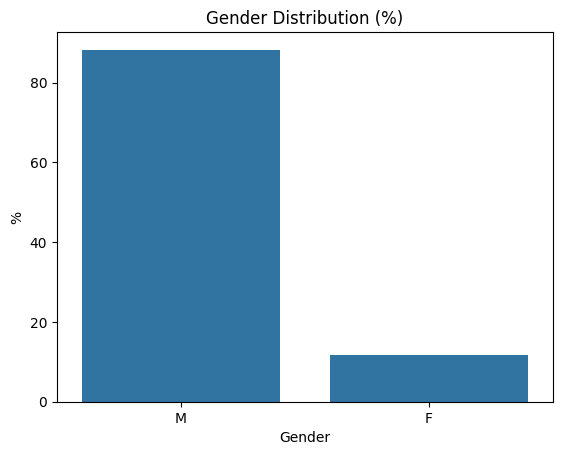

In [40]:
# gender distribution plot
gender_counts = df['gender'].value_counts(normalize=True) * 100

sns.barplot(x=gender_counts.index, y=gender_counts)

plt.title('Gender Distribution (%)')
plt.xlabel('Gender')
plt.ylabel('%')

plt.show()

In [41]:
df['countryOfCitizenship'].unique()

array(['France', 'United States', 'Mexico', 'India', 'Spain', 'China',
       'Canada', 'Germany', 'Italy', 'Austria', 'Hong Kong', 'Japan',
       'Switzerland', 'Australia', 'Indonesia', 'Russia', 'Chile',
       'United Kingdom', 'Brazil', 'Czech Republic', 'Singapore',
       'Sweden', 'Thailand', 'Netherlands', 'Nigeria', 'Israel', 'Cyprus',
       'United Arab Emirates', 'South Africa', 'Malaysia', 'New Zealand',
       'Philippines', 'South Korea', 'Norway', 'Egypt', 'Denmark',
       'Ireland', 'Colombia', 'Poland', 'Taiwan', 'Ukraine', 'Turkey',
       'Georgia', 'Portugal', 'Kazakhstan', 'Algeria', 'Venezuela',
       'Vietnam', 'Finland', 'Belgium', 'Greece', 'Argentina', 'Lebanon',
       'Oman', 'Iceland', 'Monaco', 'Bulgaria', 'Romania', 'Zimbabwe',
       'Qatar', 'Nepal', 'Slovakia', 'Morocco', 'Hungary', 'Tanzania',
       'Peru', 'Macau', 'Estonia', 'Armenia', 'Bangladesh'], dtype=object)

<Axes: xlabel='countryOfCitizenship,country'>

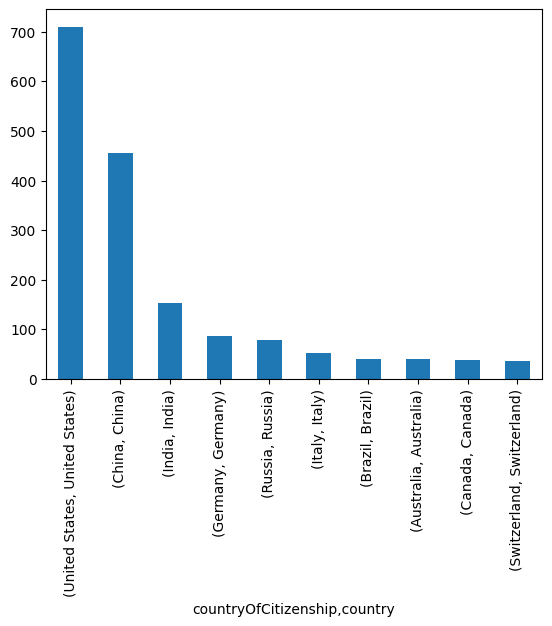

In [42]:
# top 10 countries (Citizenship) plot
top_10 = df[['countryOfCitizenship', 'country']].value_counts().head(10)
top_10.plot(kind='bar')

In [43]:
# count of billionaires whose still living at country of citizenship
count = (df['country'] != df['countryOfCitizenship']).sum()
print(count)

220


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369 entries, 0 to 2639
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2369 non-null   int64  
 1   finalWorth                                  2369 non-null   int64  
 2   personName                                  2369 non-null   object 
 3   country                                     2369 non-null   object 
 4   city                                        2369 non-null   object 
 5   industries                                  2369 non-null   object 
 6   countryOfCitizenship                        2369 non-null   object 
 7   selfMade                                    2369 non-null   int64  
 8   gender                                      2369 non-null   object 
 9   lastName                                    2369 non-null   object 
 10  firstName        

In [45]:
# count of billionaires whose have the same last name
count = 0
last_names = df.lastName.values  # Get all last names as a NumPy array

for i in range(len(last_names) - 1):  # Iterate until the second-to-last element
    if last_names[i] == last_names[i + 1]:  # Compare current with the next
        count += 1

print(count)

181
